<h1> Setup </h1>

In [1]:
from __future__ import division
import scipy 
import scipy.interpolate as ip
from pylab import *             # includes numpy
import matplotlib.pyplot as plt # plotting libraries from matlab
import sys
sys.path.insert(2, '//global/project/projectdirs/lux/data')
import aLib

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%pylab inline  
#always do this for plotting... don't ask me why... Googled the fix for LINUX.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures displayed in this notebook

<h1 style="color:red;"> Let's make a Tritium Beta Specturm ! :) </h1> <p> remember, Z'=Z+1 = 2 for Tritium Decay</p><h3> http://www.hindawi.com/journals/ahep/2013/293986/ <br/>http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.54.1891
<br/> Note on DocBD: http://teacher.pas.rochester.edu:8080/wiki/pub/Lux/LuxDB00000402/TritiumBetaShape.pdf</h3>

<h3> Defining Constants </h3>

In [4]:
c=1;    # speed of light
C=1e-6; #constant infront of Fermi funciton. Arbitrary. Read Katrin paper if you care about super-allowed and allowed transitions... and nuclear matrix elements that don't matter
me = 511/c**2; # rest mass of our good friend the electron, in keV
Q=18.6 # endpoint of the tritium Beta decay keV. Maximum kinetic energy the electron.
mv=0   # neutrino mass=0. There may exist a 17 keV neutrino, maybe 7 keV!! Will we ever know??? Is it The Dark Matter?? Mystery...
step_T=0.1 #step energy by 0.1 keV
T=arange(0.01, 18.6,step_T) #sweep from 0.01 to the Q value in increments of step_T.
Z=1+1; #Tritium, after the beta decay Z'=1+1;
halflife = 12.32; # half life of the tritium beta decay in years
tau = 365*halflife/0.69; # Decay constant converted to days
n = 1e6; # Assume 1e6 atoms are decaying.


<h3> Simplifications </h3>

In [5]:
# Fermi Function. Coulomb correction for the charge of the nucleas
G=(T+me*c**2)/(me*c**2); #Gamma, Total energy(E+M^2) over M^2
B=sqrt((G**2-1)/G**2); # v/c of electron. Ratio of velocity to speed of light in vacuum.
x=(2*pi*Z/137)/B; # note: fine structure constant = 137. 
F = x*(1/(1-exp(-x)))*(1.002037-0.001427*(B)); # from http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.54.1891. Measured to 1/1000
F_Kat=x*(1/(1-exp(-x))); # Katrin paper... http://www.hindawi.com/journals/ahep/2013/293986/ (really the same thing)

<h3> more blah blah blah equations, they never seem to end! </h3>

In [6]:
KE=T; #(G-1).*me*c^2; % The kinetic energy, is equal to T
E=KE+me*c**2; # the total energy. KE + rest mass
P=sqrt(E**2-me**2*c**4)/c; # momentum of the electron

<h3> Let's calculate the number density of final states in two ways... makes no difference for LUX </h3>

In [7]:
N=C*P*E*(Q+me-E)*sqrt((Q+me-E)**2-mv**2)*F # in terms of total energy. E=m0+KE. Or where Q means Q+m0
N_Kat=C*F_Kat*(KE+me)*sqrt((KE+me)**2-me**2)*(Q-KE)**2 # eqution 18 of Katrin paper. Set nutrino mass to zero... http://www.hindawi.com/journals/ahep/2013/293986/ (really the same thing)

<h3> Normalize the count to number of atoms </h3>

In [8]:
s = sum(N[~isnan(N)])*step_T # Total Counts
s_Kat = sum(N_Kat[~isnan(N_Kat)])*step_T # Total Counts (for the Katrin paper case)

N = N * (1/s * n/tau) # Decays/keV/day/1e6 atoms
N_Kat = N_Kat * (1/s * n/tau) # Decays/keV/day/1e6 atoms

<h3> create variable of kinetic energy T and N (count/dE) </h3>

In [9]:
tritium_beta_spectrum=array([T,N])

<h3 style="color:magenta;"> Make Plots!!! Woooo Plots </h3>

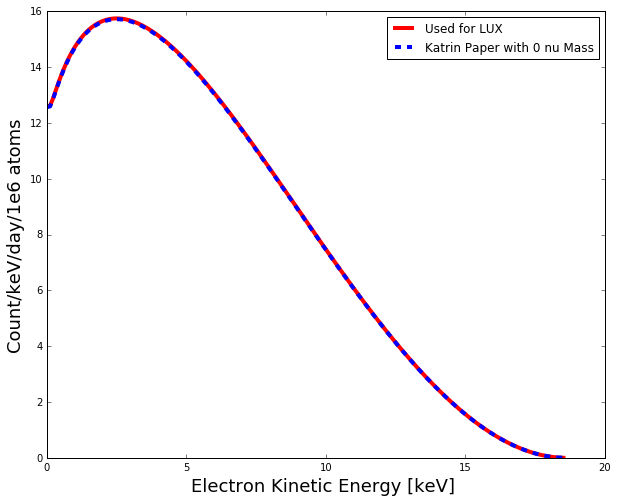

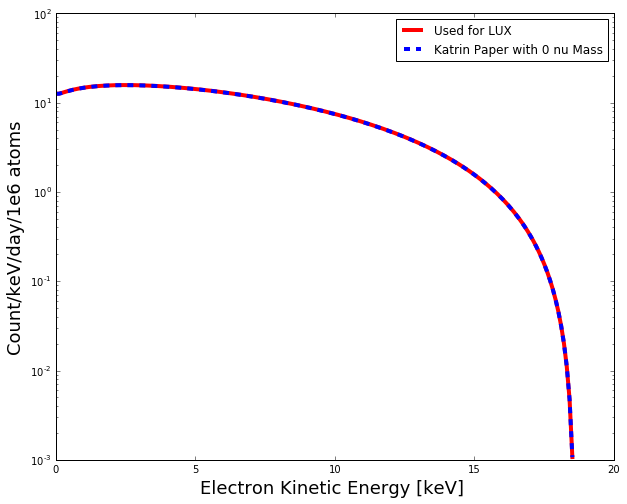

In [10]:
figure(0)
plt.plot(T,N,'r',linewidth=4)
plt.plot(T,N_Kat,'--b',linewidth=4)
plt.xlabel('Electron Kinetic Energy [keV] ',fontsize=18)
plt.ylabel('Count/keV/day/1e6 atoms',fontsize=18)
plt.legend(('Used for LUX','Katrin Paper with 0 nu Mass'))

figure(1)
plt.plot(T,N,'r',linewidth=4)
plt.plot(T,N_Kat,'--b',linewidth=4)
plt.xlabel('Electron Kinetic Energy [keV] ',fontsize=18)
plt.ylabel('Count/keV/day/1e6 atoms',fontsize=18)
plt.yscale('log')
plt.legend(('Used for LUX','Katrin Paper with 0 nu Mass'))

In [11]:
cut=T<2

In [12]:
sum(N*cut)/sum(N)

0.18770132835158548

<h1> Load in NEST yields and tritium data from December 2013 </h1>

In [13]:
#NEED TO GET NEW DATA FOR RUN04!!
#Load NEST LY,QY [2 3] -> Doke-Tritium LY,QY [4 5] -> and Tritium_Beta LY,QY [6 7]
tritium_beta=np.loadtxt('//global/homes/r/rknoche/Tritium_Spec_LYQY_paper.txt')
tritium_beta[:,0]=T
tritium_beta[:,1]=N

#Load the Dec 2013 tritium data.VUV corrected, spike count for S1. XYZ corrected rq with 83Kr. Cut from 35-305us. <20cm radius.
#tritium_data=np.loadtxt('//global/homes/r/rknoche/Run04_Sep2014_Kr2p14_CH3TData_TwoLineFloat.txt')
tritium_data=np.loadtxt('//global/homes/r/rknoche/Run04_Feb2016_Kr2p22_CH3TData.txt')
S1=tritium_data[:,0]
S2=tritium_data[:,1]
dTus=tritium_data[:,2]

In [14]:
g1_Doke=0.098 
Eeff_Doke=0.808
Eeff_Beta=0.808
SE_WS=25.08
sigma_SE=5.48;  #From LUG
g2_Doke= SE_WS*Eeff_Doke 


g1_Beta=g1_Doke 
g2_Beta=g2_Doke 

In [15]:
E_Doke=1/73*(tritium_data[:,0]/g1_Doke + tritium_data[:,1]/g2_Doke)
E_Beta=1/73*(tritium_data[:,0]/g1_Beta + tritium_data[:,1]/g2_Beta)

<h1 style="color:red;"> Adding Detector Resolution.</h1>
<h3> We define energy as some linear combination of number of photons and electrons that we collect, so sigma E is a function of sigma N_photons and sigma N_electrons </h3>

<h3>
E/W= N_gamma + N_electron <br/>
E/W= S1/g1 + S2/g2
</h3>

<h3 style="color:magenta;">Generate Tritium spectrum with detector resolution and recombination variance.<br/> 
g1=0.117, Eeff=0.58, with inst. flucs, with singlePE resultion in S1. For MAX det res</h3>

In [16]:
# Setup constants...
ex_to_ion_alpha=0.20; #exciton to ion ratio ... alpha

sigma_PE=0.50; # resolution of 1 photon. We are using spike count, so this should be 0

inst_s1=6; #measured from Doke 6 ... seems to turn off below ~200 keV ?
inst_s2=8; #measured from Doke 8  ... seems turn off below ~200 keV ?
#using 0.85 as average extraction factor for a 1000 us electron lifetime
#and 320 us drift length.

g1=g1_Doke #From Doke plot
Eeff=Eeff_Doke #From Doke plot #### Please NOTE: using 0.48 makes NO FREAKING DIFFERENCE!!! try for yourself :) 
SE_size = SE_WS # For December tritium data.... use 24.66 in Aug 2013, same as W.S.

#######################################################################################################
coeff_ng_sig_stat=sqrt((1-g1+sigma_PE**2)/g1);
coeff_ne_sig_stat=sqrt(((1-Eeff)*Eeff*SE_size**2+Eeff*sigma_SE**2)*0.85/(Eeff*SE_size)**2+0.155);

trial_m=1000; # about 150k with trial_m = 100
trials=sum(ceil(tritium_beta[:,1]*trial_m)); #tritium dN/dE is fractional so multiply amplitute. 
subtrials=np.ones((tritium_beta[:,1].size,1));

gamma_T=np.ones((trials,1)); #  Tritium gamma spectrum
e_T=np.ones((trials,1));     #  Tritium electron spectrum.


kk=1; # kk will equal the total number of simulated tritium events

for jj in range(0, tritium_beta[:,0].size): #% sweep through each energy bin
    print(jj),
    subtrials[jj]=ceil(tritium_beta[jj,1]*trial_m)
    mean_gamma_T=tritium_beta[jj,2] # 2 for NESTv98 LY, 5 is with first fit to tritium.
    mean_e_T=tritium_beta[jj,3] # 3 for NESTv98 QY, 6 is with first fit to tritium.

    n_ion_T=(mean_gamma_T+mean_e_T)/(1+ex_to_ion_alpha);
    r_T=(mean_gamma_T/mean_e_T-ex_to_ion_alpha)/(mean_gamma_T/mean_e_T+1) #mean recombination fraction

    #Add functional form of recombination variance.%%%%%%%%%%%%%%%%%%% Cancels out in E space
    Recomb_V_T=(0.07*n_ion_T)**2;
    Fano_V=0; 

    for ii in range(0, subtrials[jj]-1): #% one energy bin, test for recombination and stat
        
        recomb_fluc = np.random.normal(0,sqrt(Recomb_V_T),1) #mu, sigma , 1
        Fano_fluc= 0; #normrnd(0,sqrt(Fano_V));
        #Add functional form of S1 and S2 smearing%%%%%%%%%%%%%%%%
        sigma_stat_gamma_R= sqrt(abs((coeff_ng_sig_stat*sqrt(abs(mean_gamma_T+recomb_fluc+r_T*Fano_fluc)))**2+(inst_s1/100*(mean_gamma_T+recomb_fluc+r_T*Fano_fluc) )**2 ));
        sigma_stat_e_R= sqrt(abs((coeff_ne_sig_stat*sqrt(abs(mean_e_T-recomb_fluc+(1-r_T)*Fano_fluc)))**2 + (inst_s2/100*(mean_e_T-recomb_fluc+(1-r_T)*Fano_fluc) )**2 )); 

        gamma_T[kk]=np.random.normal(mean_gamma_T+recomb_fluc+r_T*Fano_fluc,sigma_stat_gamma_R,1) #recomb + photons and - electrons
        e_T[kk]= np.random.normal(mean_e_T-recomb_fluc+(1-r_T)*Fano_fluc,sigma_stat_e_R,1) #%recomb - photons and + electrons
        kk=kk+1;

#photon spectrum: gamma_T
#electron spectrum: e_T
# Energy...-> now smeared with detector resultion.
E_com_Tsim_NEST_MAX=1/73*(gamma_T+e_T); 

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185


(0, 0.1146606315778388)

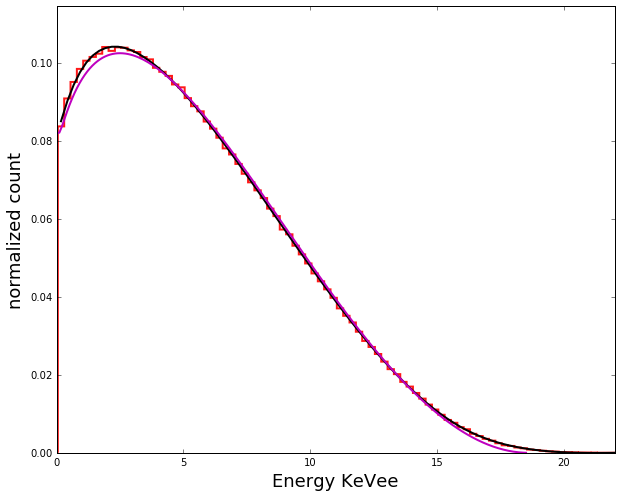

In [17]:
binwidth=0.25 # keV
n_NEST_MAX, bin_edges_NEST_MAX, patches = plt.hist(E_com_Tsim_NEST_MAX, bins=np.arange(0.05, 25 + binwidth, binwidth), normed=1, facecolor='none',edgecolor='red',linewidth=2, histtype='step', alpha=0.9)
plt.xlabel('Energy KeVee',fontsize=18)
plt.ylabel('normalized count',fontsize=18)
plt.xlim([0,25])
left,right = bin_edges_NEST_MAX[:-1],bin_edges_NEST_MAX[1:]
bin_center_NEST_MAX=(right+left)/2

s = ip.UnivariateSpline(bin_center_NEST_MAX,n_NEST_MAX)
s.set_smoothing_factor(1e-5)
plt.plot(bin_center_NEST_MAX,s(bin_center_NEST_MAX),'k',linewidth=2)

scale_factor=sum(N)*0.1/(sum(n_NEST_MAX)*binwidth)
plt.plot(T,N/scale_factor,'m',linewidth=2)

plt.xlim([0,22]);
plt.ylim([0, 1.1*max(n_NEST_MAX)]);

#plt.yscale('log')

<h3 style='color:red;'> The Feb 2016 the data </h3>

(0, 22)

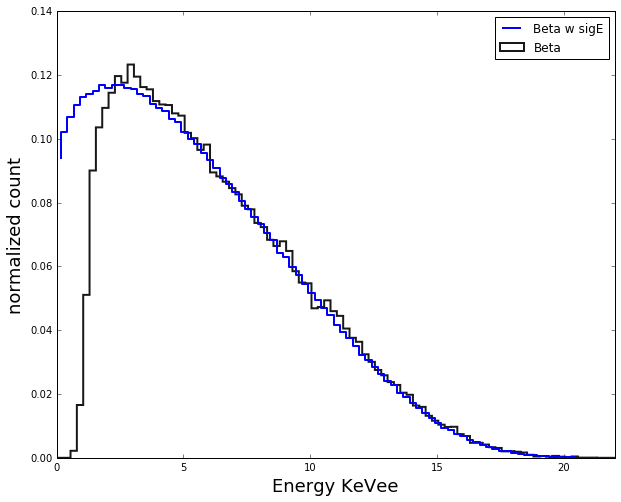

In [18]:
binwidth=0.25 # keV

n_data, bin_edges_data, patches = plt.hist(E_Doke, bins=np.arange(0.05, 25 + binwidth, binwidth), normed=1, facecolor='none',edgecolor='black',linewidth=2, histtype='step', alpha=0.9)
plt.xlabel('Energy KeVee',fontsize=18)
plt.ylabel('normalized count',fontsize=18)

left,right = bin_edges_data[:-1],bin_edges_data[1:]
bin_center_data=(right+left)/2


data_scale_factor=sum(n_data[bin_center_data>3])/sum(n_NEST_MAX[bin_center_NEST_MAX>3])

plt.step(bin_center_NEST_MAX,n_NEST_MAX*data_scale_factor,'b',linewidth=2)
#plt.plot(T,N/scale_factor*data_scale_factor,'m',linewidth=2)

plt.legend(('Beta w sigE','Beta','Data','Data with Beta values'))
plt.xlim([0,22])
#plt.yscale('log')

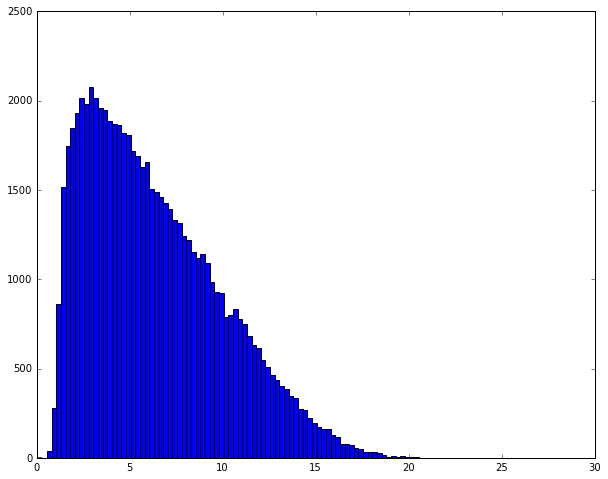

In [19]:
num_data, num_data_bins, num_data_patches=plt.hist(E_Doke,bins=np.arange(0.05, 25 + binwidth, binwidth));

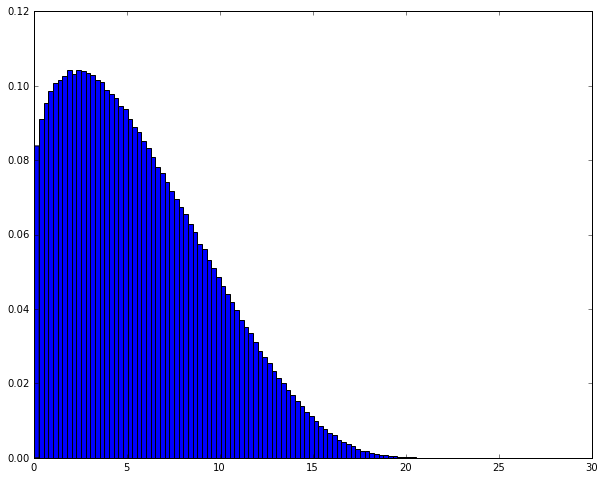

In [20]:
num_sim, num_sim_bins, num_sim_patches= plt.hist(E_com_Tsim_NEST_MAX, bins=np.arange(0.05, 25 + binwidth, binwidth),normed=1);

In [21]:


SimToData_scale_factor=sum(num_data[bin_center_data>3])/sum(num_sim[bin_center_NEST_MAX>3])
frac_res=(num_data-num_sim*SimToData_scale_factor)/sqrt(num_data)


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


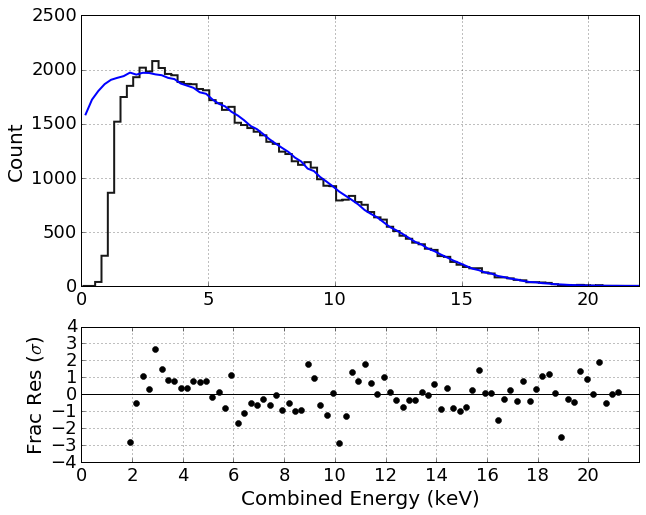

In [22]:
from matplotlib import gridspec

fig = plt.Figure(figsize=(8,6))
gs = gridspec.GridSpec(2, 1, height_ratios=[10,5])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.hist(E_Doke,bins=np.arange(0.05, 25 + binwidth, binwidth),facecolor='none',edgecolor='black',linewidth=2, histtype='step', alpha=0.9);
ax1.plot(bin_center_NEST_MAX,num_sim*SimToData_scale_factor,linewidth=2,color='blue')
ax1.set_xlim([0,22])
ax1.grid(True)
ax1.set_ylabel(r'Count',fontsize=20)
for tick in ax1.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
for tick in ax1.yaxis.get_major_ticks():
                tick.label.set_fontsize(18) 


ax2.plot(bin_center_NEST_MAX,frac_res,'ko',linewidth=2)
ax2.plot([0,22],[0,0],'k')
ax2.grid(True)
ax2.set_xticks(np.arange(0,22,2))
ax2.set_xlim([0,22])
ax2.set_ylim([-4,4])
ax2.set_ylabel(r'Frac Res ($\sigma$)',fontsize=20)
ax2.set_xlabel('Combined Energy (keV)',fontsize=20)
for tick in ax2.xaxis.get_major_ticks():
                tick.label.set_fontsize(18) 
for tick in ax2.yaxis.get_major_ticks():
                tick.label.set_fontsize(18)  

In [23]:
thresh=num_data/(num_sim*SimToData_scale_factor)
thresh_err=sqrt( (sqrt(num_data)/(num_sim*SimToData_scale_factor))**2 + (num_data/(num_sim*(SimToData_scale_factor**2)))**2)
no_nan_cut=np.logical_not(numpy.isnan(thresh))*np.logical_not(numpy.isinf(thresh))
thresh_nonan=thresh[no_nan_cut]
xbin_nonan=bin_center_NEST_MAX[no_nan_cut]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from IPython.kernel.zmq import kernelapp as app


In [24]:
def func(x,mu,sig):
    return (1/2)*scipy.special.erf((x-mu)/(sqrt(2)*sig))+(1/2)



In [25]:

popt, pcov = scipy.optimize.curve_fit(func,xbin_nonan,thresh_nonan)
thresh_yval=(1/2)*scipy.special.erf((bin_center_NEST_MAX-popt[0])/(sqrt(2)*popt[1]))+(1/2)

popt

array([ 1.21435683,  0.29387623])

In [26]:
from scipy import optimize

def line( x, p):
    return p[0]*x + p[1] 

def linef( x, p0, p1):
    return p0*x + p1

def erfit( x, p0, p1):
    return (1/2)*scipy.special.erf((x-p0)/(sqrt(2)*p1))+(1/2)
    


def fit_function(p0, datax, datay, function, **kwargs):

    errfunc = lambda p, x, y: function(x,p) - y

    ##################################################
    ## 1. COMPUTE THE FIT AND FIT ERRORS USING leastsq
    ##################################################

    # If using optimize.leastsq, the covariance returned is the 
    # reduced covariance or fractional covariance, as explained
    # here :
    # http://stackoverflow.com/questions/14854339/in-scipy-how-and-why-does-curve-fit-calculate-the-covariance-of-the-parameter-es
    # One can multiply it by the reduced chi squared, s_sq, as 
    # it is done in the more recenly implemented scipy.curve_fit
    # The errors in the parameters are then the square root of the 
    # diagonal elements.   

    pfit, pcov, infodict, errmsg, success = \
        optimize.leastsq( errfunc, p0, args=(datax, datay), \
                          full_output=1)

    if (len(datay) > len(p0)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p0))
        pcov = pcov * s_sq
    else:
        pcov = inf

    error = [] 
    for i in range(len(pfit)):
        try:
          error.append( numpy.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = numpy.array(error) 

    ###################################################
    ## 2. COMPUTE THE FIT AND FIT ERRORS USING curvefit
    ###################################################

    # When you have an error associated with each dataY point you can use 
    # scipy.curve_fit to give relative weights in the least-squares problem. 
    datayerrors = kwargs.get('datayerrors', None)
    curve_fit_function = kwargs.get('curve_fit_function', function)
    if datayerrors is None:
        pfit, pcov = \
            optimize.curve_fit(curve_fit_function,datax,datay,p0=p0)
    else:
        pfit, pcov = \
             optimize.curve_fit(curve_fit_function,datax,datay,p0=p0,\
                                sigma=datayerrors)
    error = [] 
    for i in range(len(pfit)):
        try:
          error.append( numpy.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = numpy.array(error)  


    ####################################################
    ## 3. COMPUTE THE FIT AND FIT ERRORS USING bootstrap
    ####################################################        

    # An issue arises with scipy.curve_fit when errors in the y data points
    # are given.  Only the relative errors are used as weights, so the fit
    # parameter errors, determined from the covariance do not depended on the
    # magnitude of the errors in the individual data points.  This is clearly wrong. 
    # 
    # To circumvent this problem I have implemented a simple bootstraping 
    # routine that uses some Monte-Carlo to determine the errors in the fit
    # parameters.  This routines generates random datay points starting from
    # the given datay plus a random variation. 
    #
    # The random variation is determined from average standard deviation of y
    # points in the case where no errors in the y data points are avaiable.
    #
    # If errors in the y data points are available, then the random variation 
    # in each point is determined from its given error. 
    # 
    # A large number of random data sets are produced, each one of the is fitted
    # an in the end the variance of the large number of fit results is used as 
    # the error for the fit parameters. 

    # Estimate the confidence interval of the fitted parameter using
    # the bootstrap Monte-Carlo method
    # http://phe.rockefeller.edu/LogletLab/whitepaper/node17.html
    residuals = errfunc( pfit, datax, datay)
    s_res = numpy.std(residuals)
    ps = []
    # 100 random data sets are generated and fitted
    for i in range(100):
      if datayerrors is None:
          randomDelta = numpy.random.normal(0., s_res, len(datay))
          randomdataY = datay + randomDelta
      else:
          randomDelta =  numpy.array( [ \
                             numpy.random.normal(0., derr,1)[0] \
                             for derr in datayerrors ] ) 
          randomdataY = datay + randomDelta
      randomfit, randomcov = \
          optimize.leastsq( errfunc, p0, args=(datax, randomdataY),\
                            full_output=0)
      ps.append( randomfit ) 

    ps = numpy.array(ps)
    mean_pfit = numpy.mean(ps,0)
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * numpy.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit


    # Print results 
    print "\nlestsq method :"
    print "pfit = ", pfit_leastsq
    print "perr = ", perr_leastsq
    print "\ncurvefit method :"
    print "pfit = ", pfit_curvefit
    print "perr = ", perr_curvefit
    print "\nbootstrap method :"
    print "pfit = ", pfit_bootstrap
    print "perr = ", perr_bootstrap

In [27]:
pcov

array([[  2.75614733e-01,   3.95160400e-06],
       [  3.95160400e-06,   5.51248629e-01]])

In [28]:
popt_err=np.sqrt(np.diag(pcov))
popt_err

array([ 0.52499022,  0.7424612 ])

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from IPython.kernel.zmq import kernelapp as app
//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2790: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


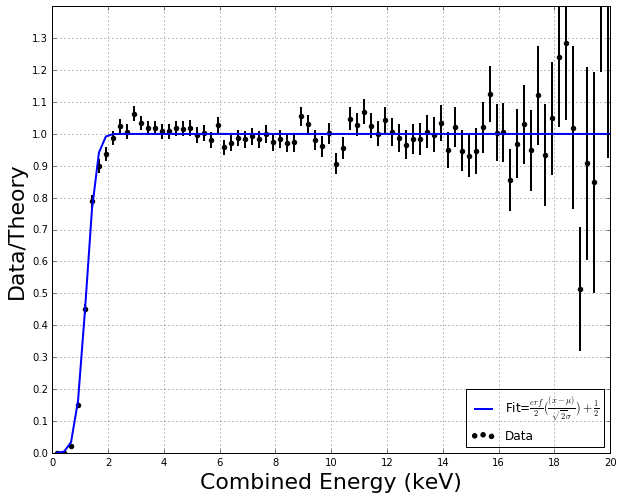

In [29]:
thresh=num_data/(num_sim*SimToData_scale_factor)
thresh_err=sqrt( (sqrt(num_data)/(num_sim*SimToData_scale_factor))**2 + (num_data/(num_sim*(SimToData_scale_factor**2)))**2)
plt.errorbar(bin_center_NEST_MAX,thresh,yerr=thresh_err,xerr=None,ecolor='black',elinewidth=2,capsize=0,fmt=None)
plt.xlim([0,20])
plt.ylim([0,1.4])
plt.scatter(bin_center_NEST_MAX,thresh,c='black',marker='o')
plt.plot(bin_center_NEST_MAX,thresh_yval,linewidth=2)
plt.xticks(np.arange(0,22,2))
plt.yticks(np.arange(0,1.4,0.1))
plt.ylabel('Data/Theory',fontsize=22)
plt.xlabel('Combined Energy (keV)',fontsize=22)
plt.legend((r'Fit=$\frac{erf}{2}(\frac{(x-\mu)}{\sqrt{2}\sigma}) + \frac{1}{2}$','Data'),loc='lower right')


ax=plt.gca()
ax.grid(True)


<h1> Minimize Chi^2 from 4 to 20 keVee to extract optimal g1 g2</h1>

In [186]:
Fit_min_keV=array([2,4,4])     # normalize the histograms above 4 keV
Fit_max_keV=array([16,18,20]) # fit histograms to max keV. Nominal is 20 keV
Chi_hist_min=1e6*ones(Fit_max_keV.size)
Chi_red_min=1e6*ones(Fit_max_keV.size)
g1_best=ones(Fit_max_keV.size)
g2_best=ones(Fit_max_keV.size)

g1_range=np.arange(0.08,0.11,0.001) #scan g1 ... use 0.0002?
g2_range=np.arange(17.0,23.0,0.05) #scan g2
SE_size=SE_WS #measured in Dec trititum data
sigma_SE_size=sigma_SE #measured in Dec trititum data

Chi_red=10*ones((g1_range.size,g2_range.size,Fit_max_keV.size))
Chi_hist=1000*ones((g1_range.size,g2_range.size,Fit_max_keV.size))

E_step=0.25;
jj=0;
print 'g2= '
for g2_scan in g2_range:
    ii=0;
    print g2_scan,
    for g1_scan in g1_range:
    
        E_com_test=1/73*(S1/g1_scan + S2/g2_scan)

        n, bins = histogram(E_com_test, bins=np.arange(0.05, 25 + E_step, E_step), normed=0)
        bincenters = 0.5*(bins[1:]+bins[:-1])
        nTs, binsTs = histogram(E_com_Tsim_NEST_MAX, bins=np.arange(0.05, 25 + E_step, E_step), normed=0)
        bincentersTs = 0.5*(bins[1:]+bins[:-1])

        for kk, minE in enumerate(Fit_min_keV):
            norm_real_s=sum(n[aLib.inrange(bincenters,[Fit_min_keV[kk], Fit_max_keV[kk]])]*E_step)/sum(nTs[aLib.inrange(bincentersTs,[Fit_min_keV[kk], Fit_max_keV[kk]])]*E_step)    
            diff_hist= (n[aLib.inrange(bincenters,[Fit_min_keV[kk], Fit_max_keV[kk]])]-nTs[aLib.inrange(bincentersTs,[Fit_min_keV[kk], Fit_max_keV[kk]])]*norm_real_s)**2/n[aLib.inrange(bincenters,[Fit_min_keV[kk], Fit_max_keV[kk]])]  # (diff/sigma)^2 ... where sigma ~ sqrt(no)
            Chi_red[ii,jj,kk]=sum(diff_hist)/(n[aLib.inrange(bincenters,[Fit_min_keV[kk],Fit_max_keV[kk]])].size) # devide by v to get red_X^2. The two hisotograms are nomalized above norm_keV
            Chi_hist[ii,jj,kk]=sum(diff_hist) 
 
            if Chi_hist[ii,jj,kk]< Chi_hist_min[kk] :
                g1_best[kk]=g1_scan
                g2_best[kk]=g2_scan
                Chi_hist_min[kk]=Chi_hist[ii,jj,kk]
                Chi_red_min[kk]=Chi_red[ii,jj,kk]
            
        ii=ii+1
            
    jj=jj+1


g2= 
17.0 17.05 17.1 17.15 17.2 17.25 17.3 17.35 17.4 17.45 17.5 17.55 17.6 17.65 17.7 17.75 17.8 17.85 17.9 17.95 18.0 18.05 18.1 18.15 18.2 18.25 18.3 18.35 18.4 18.45 18.5 18.55 18.6 18.65 18.7 18.75 18.8 18.85 18.9 18.95 19.0 19.05 19.1 19.15 19.2 19.25 19.3 19.35 19.4 19.45 19.5 19.55 19.6 19.65 19.7 19.75 19.8 19.85 19.9 19.95 20.0 20.05 20.1 20.15 20.2 20.25 20.3 20.35 20.4 20.45 20.5 20.55 20.6 20.65 20.7 20.75 20.8 20.85 20.9 20.95 21.0 21.05 21.1 21.15 21.2 21.25 21.3 21.35 21.4 21.45 21.5 21.55 21.6 21.65 21.7 21.75 21.8 21.85 21.9 21.95 22.0 22.05 22.1 22.15 22.2 22.25 22.3 22.35 22.4 22.45 22.5 22.55 22.6 22.65 22.7 22.75 22.8 22.85 22.9 22.95


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:33: RuntimeWarning: divide by zero encountered in true_divide


In [187]:
Chi_red_min

array([ 0.95393484,  0.76229903,  0.82744607])

In [188]:
[g1_best,g2_best,g2_best/SE_WS]

[array([ 0.097,  0.098,  0.098]),
 array([ 20.4,  20.3,  20.3]),
 array([ 0.81339713,  0.80940989,  0.80940989])]

In [189]:
Chi_red[isinf(Chi_red)]=max(Chi_red[~isinf(Chi_red)]) # clean up inf
Chi_hist[isinf(Chi_hist)]=max(Chi_hist[~isinf(Chi_hist)]) # clean up inf
Chi_hist[isnan(Chi_hist)]=max(Chi_hist[~isnan(Chi_hist)]) ####
Chi_hist_diff=Chi_hist-Chi_hist.min()*ones(Chi_hist.shape) # Chi_diff to get 1,2,3 sigma intervals

In [190]:
savetxt('/global/homes/r/rknoche/iPyNb/Analysis_Code/Run04_CH3T_G1G2_Kr2p22/Feb2016_CH3T_Kr2p22_g1g2.txt',[g1_best,g2_best])
savetxt('/global/homes/r/rknoche/iPyNb/Analysis_Code/Run04_CH3T_G1G2_Kr2p22/Feb2016_CH3T_Kr2p22_Chi.txt',Chi_hist.flatten())

In [191]:
Chi_hist_diff=Chi_hist
for ii in [0,1,2]:
    Chi_hist_diff[:,:,ii]=Chi_hist[:,:,ii]-Chi_hist[:,:,ii].min()*ones(Chi_hist[:,:,ii].shape)


In [192]:
# calculate the chi_diff to n_sigma
conf_to_chiDiff=array([linspace(0,40,10000), 1-scipy.stats.chisqprob(linspace(0,40,10000),2)]) #1-chisqrprob
sigma_to_conf=array([linspace(0,8,10000), scipy.special.erf(linspace(0,8,10000)/sqrt(2))])
chiDiff_to_sigma=array([conf_to_chiDiff[0,:], interp(conf_to_chiDiff[1,:],sigma_to_conf[1,:],sigma_to_conf[0,:])])

In [193]:
Sig_hist=interp(Chi_hist_diff, chiDiff_to_sigma[0,:], chiDiff_to_sigma[1,:]) # get the sigma contour from 2D X^2 diff

In [194]:
savetxt('/global/homes/r/rknoche/iPyNb/Analysis_Code/Run04_CH3T_G1G2_Kr2p22/Feb2016_CH3T_Kr2p22_g1g2.txt',[g1_best,g2_best])
savetxt('/global/homes/r/rknoche/iPyNb/Analysis_Code/Run04_CH3T_G1G2_Kr2p22/Feb2016_CH3T_Kr2p22_Chi.txt',Chi_hist.flatten())
savetxt('/global/homes/r/rknoche/iPyNb/Analysis_Code/Run04_CH3T_G1G2_Kr2p22/Feb2016_CH3T_Kr2p22_Chi_Diff.txt',Chi_hist_diff.flatten())
savetxt('/global/homes/r/rknoche/iPyNb/Analysis_Code/Run04_CH3T_G1G2_Kr2p22/Feb2016_CH3T_Kr2p22_Sig.txt',Sig_hist.flatten())

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from IPython.kernel.zmq import kernelapp as app


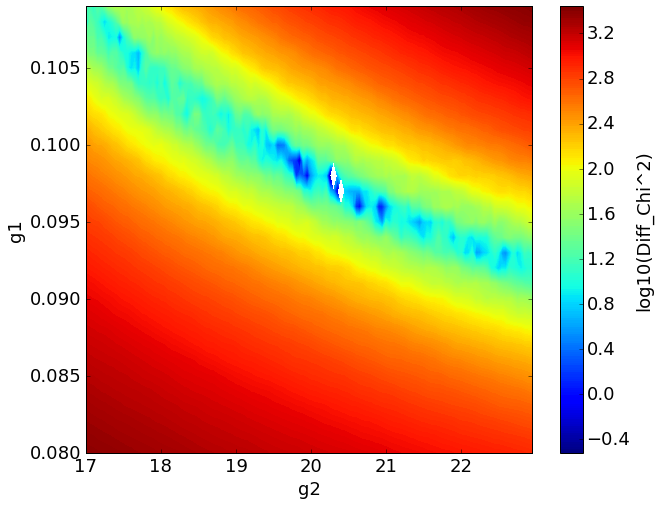

In [195]:
v=arange(0,3.05,0.05);
contourf(g2_range,g1_range,log10(Chi_hist_diff.min(2)),200,linecolor='none'); 
cb=plt.colorbar()
plt.xlabel('g2')
plt.ylabel('g1')
cb.set_label('log10(Diff_Chi^2)')
plt.rcParams.update({'font.size': 18})

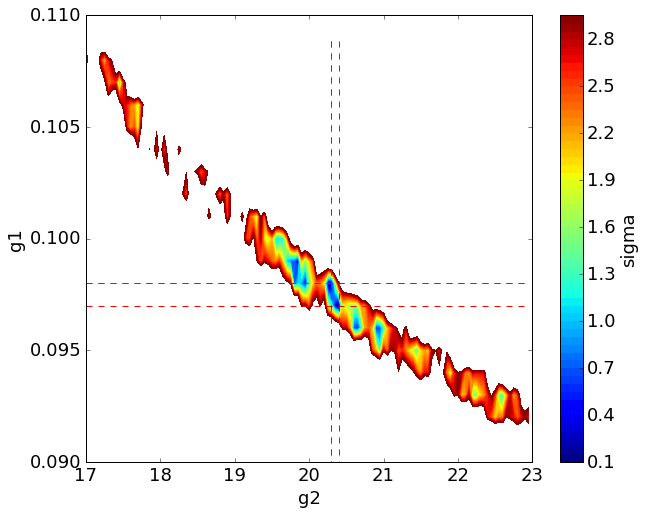

In [196]:
v=arange(0.1,3.0,0.05);
contourf(g2_range,g1_range,Sig_hist.min(2),v,linecolor='none') 
cb=colorbar()
cb.set_label('sigma')
plt.xlabel('g2',fontsize=18)
plt.ylabel('g1',fontsize=18)
plt.plot([g2_range.min(),g2_range.max()],[g1_best,g1_best],'--r')
plt.xlim([17,23])
plt.ylim([0.09,0.11])
plt.plot([g2_best,g2_best],[g1_range.min(),g1_range.max()],'--r')
#plt.text(g2_best*1.02,g1_best*1.02,'g1={:1.4g}\ng2={:1.4g}'.format(g1_best,g2_best))

In [197]:
min_a=100000
from operator import itemgetter

for i in range(0,len(Chi_red[1,:,1])):
    b,a=min(enumerate(Chi_red[:,i,1]), key=itemgetter(1))
    if a < min_a:
        min_a=a
        min_b=b
        min_i=i

print min_a,min_i,min_b

0.762299028428 66 18


In [198]:
Sig_hist[18,68,2]

3.2170352865864795

In [199]:
g1_range=np.arange(0.08,0.11,0.001)
g2_range=np.arange(17.0,23.0,0.05) 

g2_sig=Sig_hist[min_b,:,2]
g1_sig=Sig_hist[:,min_i,2]

interp(0.0982, g1_range, g1_sig) 


In [200]:
interp(20.327, g2_range, g2_sig) 

In [210]:
interp(1.4, chiDiff_to_sigma[0,:], chiDiff_to_sigma[1,:])

0.6798723357293516